In [21]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict

pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
mba = msrp_band_analyzer.MSRPBand()

In [33]:
mba.update_company_data(['RA','EL'])
#mba.update_company_data(['RA','EL'])

#['EL','EMT']

c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000596-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-17

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-16

[SUCCESS] All download summaries look good!
[SUCCESS] No unknown transfer packages!
93.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 0 (0.0%)
# transactions total: 154238
# receipts with mismatching transactions: 1 (0.001365075898219941%)
# receipts missing transactions: 4 (0.005460303592879764%)
# receipts total: 73256
# mismatch receipt vs transactions (transactions over): 1 (100.0%)
# mismatch receipt vs transactions (transactions under): 0 (0.0%)
### Adding new columns calculated by average price per unit ### 	
### Sorting time series ### 	
### Removing NAs from product category row ### 	
### Breaking down product names into specific measures with regu

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:318: SettingWithCopyWarning

### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:299: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['extract' 'edible' 'pre-roll flower' 'flower' 'tincture'
 'pre-roll infused' 'other concentrate' 'vape cartridge' 'topical'
 'clone - cutting' 'pre-roll leaf' 'seeds' 'capsule' 'immature plant'
 'shake']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'flower' 'pre-roll flower' 'edible' 'extract' 'tincture'
 'topical' 'clone - cutting' 'pre-roll infused' 'other concentrate'
 'pre-roll leaf' 'seeds' 'immature plant' 'capsule' 'shake']


In [29]:
idx = (mba.company_sales_df.letter_measure_from_product_name.isna() == False) & (mba.company_sales_df.tx_unit_of_measure == 'Each')
mba.company_sales_df.extracted_units[idx]




195371   NaN
195372   NaN
195377   NaN
195378   NaN
195381   NaN
          ..
1753     NaN
1752     NaN
1750     NaN
1748     NaN
0        NaN
Name: extracted_units, Length: 102905, dtype: float64

In [31]:
mba.company_sales_df.extracted_units[idx] = mba.company_sales_df.letter_measure_from_product_name[idx]

<ipython-input-31-6595c6f391d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mba.company_sales_df.extracted_units[idx] = mba.company_sales_df.letter_measure_from_product_name[idx]


In [34]:
mba.company_sales_df.head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
197116,C10-0000596-LIC,0015284616,active,Consumer,2020-03-08 12:30:35.440000+00:00,2020-03,3,117.0,active,3016876,1A4060300008D22000021564,STIIIZY - OG Kush Pod - 0.5g,Vape Cartridge (volume - each),Each,2.0,54.0,27.000000,2020-03,NaN,0.5,0.5g,NaN,NaN,54.000000,0.5,vape cartridge,True,STIIIZY,STIIIZY (Vape Cartridge (volume - each))
195368,C10-0000596-LIC,0016970674,active,Consumer,2020-03-26 15:48:45.930000+00:00,2020-03,3,81.0,active,3071273,1A4060300006D0A000109786,Pacific Stone Flower 3.5g Pouch Hybrid 805 Gl...,Flower,Grams,3.5,18.0,5.142857,2020-03,11369,NaN,3.5g,NaN,NaN,5.142857,1.0,flower,False,Pacific Stone Flower 3.5g Pouch Hybrid 805 Gl...,Pacific Stone Flower 3.5g Pouch Hybrid 805 Gl...
195371,C10-0000596-LIC,0016970485,active,Consumer,2020-03-26 15:47:27.150000+00:00,2020-03,2,60.0,active,3016870,1A4060300008D22000021558,STIIIZY - Sour Tangie Pod - 0.5g,Vape Cartridge (volume - each),Each,1.0,30.0,30.000000,2020-03,NaN,0.5,0.5g,NaN,NaN,60.000000,0.5,vape cartridge,True,STIIIZY,STIIIZY (Vape Cartridge (volume - each))
195372,C10-0000596-LIC,0016970485,active,Consumer,2020-03-26 15:47:27.150000+00:00,2020-03,2,60.0,active,3016876,1A4060300008D22000021564,STIIIZY - OG Kush Pod - 0.5g,Vape Cartridge (volume - each),Each,1.0,30.0,30.000000,2020-03,NaN,0.5,0.5g,NaN,NaN,60.000000,0.5,vape cartridge,True,STIIIZY,STIIIZY (Vape Cartridge (volume - each))
195374,C10-0000596-LIC,0016968860,active,Consumer,2020-03-26 15:38:15.070000+00:00,2020-03,1,28.8,active,3080665,1A4060300003D05000000300,Gelato (QP Box),Flower (packaged eighth - each),Each,1.0,28.8,28.800000,2020-03,NaN,NaN,NaN,NaN,NaN,8.228571,3.5,flower,False,Gelato (QP Box),Gelato (QP Box)


In [5]:
mba.company_sales_df.brands.value_counts()

STIIIZY                                                                       146161
WYLD                                                                           43230
KE                                                                             35657
Rich & Ruthless                                                                26976
FG                                                                             26875
                                                                               ...  
HOUSE WEED Doozies Single Infused Pre-Roll, Indica, 1.5g                           1
21081804 | WCTC | Prepacked Extracts | Shatter | Bananas Foster | 1G | 1CT         1
Trade Sample Korova Flower - Animal Face x Kush Mints - 3.5g / Unit                1
Cresco Honey Boo x Ice Cream Cake (1g) Live Sugar SAMPLE                           1
CALI COCO PRE                                                                      1
Name: brands, Length: 21149, dtype: int64

In [6]:
mba.company_sales_df.brands.value_counts()[:50]

STIIIZY                              146161
WYLD                                  43230
KE                                    35657
Rich & Ruthless                       26976
FG                                    26875
CRU                                   25026
Cali Flwr Farms                       23401
RD                                    21257
Fuzzies                               19788
MKC 1/8ths                            19219
Puffy Delivery                        16852
KIVA                                  16842
LIIIL                                 16037
HG                                    15754
1 ml                                  13654
Cali Flwr Farm                        13122
LIIIT                                 12749
Mr. Nice Guy                          12472
Dime 1/8 FW                           11945
Littles                               11759
GPF                                   11199
House Party                           10714
Flav                            

In [7]:
mba.company_sales_df.brands_by_category.value_counts()[:50]

STIIIZY (Vape Cartridge (weight - each))                     67483
STIIIZY (Vape Cartridge (volume - each))                     61934
WYLD (Edible (weight - each))                                43230
KE (Edible (weight - each))                                  35657
FG (Vape Cartridge (weight - each))                          24105
Fuzzies (Pre-Roll Infused)                                   19649
RD (Pre-Roll Flower)                                         18020
KIVA (Edible (weight - each))                                16833
Rich & Ruthless (Flower)                                     15201
MKC 1/8ths (Flower (packaged eighth - each))                 14553
1 ml (Vape Cartridge (weight - each))                        13654
Cali Flwr Farms (Flower (packaged eighth - each))            13650
STIIIZY (Extract (weight - each))                            13595
Mr. Nice Guy (Flower (packaged half ounce - each))           12472
CRU (Flower (packaged eighth - each))                        1

In [5]:
mba.company_sales_df.shape

(2640712, 21)

In [6]:
mba.company_sales_df.tx_product_name.value_counts()

Gorilla Glue Preroll                  9157
Gorilla Glue 8th Bag Each             8084
Snickerdoodlez Pre-roll               7698
Blue Dream Pre-roll                   7466
Rose Apple Cookies Preroll            7168
                                      ... 
Hundos - Blue Dream                      1
Elefante - Ebola Flower - 3.5g Jar       1
Moon Mints Sample Kit                    1
FF Relief Cream, half ounce              1
Guava Kush - Jar 1/8th                   1
Name: tx_product_name, Length: 35235, dtype: int64

In [7]:
temp = mba.company_sales_df.tx_product_name[mba.company_sales_df.tx_product_name.str.contains('-')].unique()
for name in temp:
    print(name)

MAAD223191 Trainwreck Hybrid .5G Cart 7017-A
JETTY - Pax Pod Alien OG - 500mg
Littles 3.5g Flower - Sativa
KE - THC Hybrid Watermelon 100mg - 43g
GF Indica 1g Pre-Roll: GMO
Preroll - Blackberry Fire 1g
S3819FG-1: Stone Single Preroll, Tangie, 1g Adult-Use : INDIVIDUAL
Rich & Ruthless - CPT Cookies (1 GM Flower) (#20-CPTC-YF1219) #1185
Flower 3.5g - Daniel LaRusso - 3.5g
(SI) ABX Sour Diesel All-In-One Vape Cartridge (.3g)
CRU 0.3g Disp - Wedding Cake
CRU 0.3g Disp - Forbidden Fruit
Outdoor - Connected - Eighth Case (32) - Gushers
MAADC21266Bloom-Era2 HiPax-Single Origin-Sativa-Silver Haze 5027-A
10421 Emerald Sky Licorice Indica Grape Noir 100mg 10-Pack (10mg ea) (24ct)
Puffy Delivery - Cartridges- 1 G - XJ-13
WYLD - Edible - 100mg - Gummy - Indica - Marionberry
Outpost - Flower - 3.5g - Venom OG
Gold Coast - PreRoll - 0.8g - Hybrid - Blue Cookies
Baby Jeeter - Infused - Pre-Roll - 2.5g - Hybrid - Grapefruit Romulan
VVS - Syringe - 1.0g - Hybrid - GG4 - Beginning Inventory
Baby Jeeter 

Rations - Cherry AK 2g Bag
Rich Cannabis Co. - Hash Rosin Coin - GMO - 0.5g - Beginning Inventory
Essentials - Wedding Crasher Sample 1g (create)
Rations - Cherry Sour Diesel 2g Bag
Rations - Strawberry Banana 2g bag
Ronen - Earthshaker OG 5g Jar
Sour George - Shatter
Honeydew Farms - 1/2 Oz Mylar - LA Kush Cake - 14g
MKC 1/8ths - 977 - Banana Cream - 3.5g
*Sample Not For Re-Sale* Henry's Original - Blue Dream - 4pk Pre-Roll
*Sample Not For Re-Sale* Henry's Original - Afgooey - 3.54g Flower
*Sample Not For Re-Sale* Henry's Original - Lemon Jack - 1g Flower
*Sample Not For Re-Sale* Henry's Original - Ice Cream Cake - 0.5g 4 Pack Pre-Rolls
*Sample Not For Re-Sale* Henry's Original - Spyrock OG - 1g Flower
*Sample Not For Re-Sale* Henry's Original - Lemon Jack - 3.54g Flower
*Sample Not For Re-Sale* Henry's Original - Afgooey - 1g Flower
*Sample Not For Re-Sale* Henry's Original - Spyrock OG - 3.5g Flower
OGKB 2.1 #7 - Flower - Eights
Sour Tangie L.S. - Persy Live Rosin - Grammed
La Famil

MAAD114104Bloom-Highlighter-Blend-CBD-v4 Rose Gold Pen Set 4068-A
Sticks Blunts - Electric Haze - 1.5g / Case of 44
RD-The Dime-Malawi Gold-1g Pre-roll
Rich & Ruthless - CPT Glue (3.5 GM Flower - SMS) (#229-CPTG-OH0820) #32540
Rich & Ruthless - CPT Glue (3.5 GM Flower) (#229-CPTG-OH0820) #32537
RD-The Dime-Sour Punch-1g Pre-roll
Cali Flwr Farm - Cali Gas OG (3.5 GM Flower) (#266-CG-OH0920) #32543
Hi Vape - Live Resin 1g Jar - Papaya
GLP - FREE | Fruit Loops 1g Live Resin Jar
Rich & Ruthless - CPT Station (3.5 GM Flower) (#222-CPTS-OH0820) #2551
Sticky - Mendo Breath - Roots - Eighth EA
HappyDay Farm - Strawberry Valley - Roots - Eighth EA
Cali Flwr Farm - Maui Wowie (3.5 GM Flower) (#272-MW-OH0920) #32531
TC-CBD-SHARK-1/8ths
Buddies - Squirt - 1g Liquid Diamonds Vape Cartridge
Cali Flwr Farm - Cali Gas OG (28 GM Flower - SMS) (#266-CG-OH0920) #32547
EMP-Moonrocks-Valley Kush-1g
GLP - FREE | Fruit Loops 1g Live Resin Cartridge
8th-Moonana Wreck-FF
Hi Vape - Live Resin 1g Jar - Gelato Ca

MAAD233381 Bloom 0.5G Jet Fuel Hybrid Carts 7058-0561
MAADG22190.01 Bloom Classic 1G Monster Cookies Indica Cartrdige 6057-0667
MAAD260353 Bloom Live Resin 5:1 CBN 0.5G Bedhead OG Catridge 4070-1290
Dose Pod - Garanimals, GSW Creative Corp
NFR-HIM Live VC500mg Ind-VNF #149-S206
Gummy Tin - Bliss Wildberry, GSW Creative Corp
Lemon Heads #4 L.S. - Live Rosin - Grammed
Hush - Gummies - 100mg - Indica - Strawberry - 27g
Claybourne Co. Power Stack 3g - (Case of 30) - Black Triangle OG x Divine Storm
Apollo Gold 3.5 gram - King OG
Apollo Gold 3.5 gram - Green Dragon
Claybourne Co. Power Stack 3g - (Case of 30) - Lemon Margy x Agent Orange
Claybourne Co. Power Stack 3g - (Case of 30) - Frozen Cakes x Hell's Fire
Honeyleaf - Animal Cookies Liquid Live Resin Pod - 1g
STIIIZY - Grape-Octane Live Rosin Jam - 1g
1L PB Souffle 3.5g Jar G022421PBS-1L
Claybourne Co. Premium Small Bud 14g - (Case of 8) - Watermelon Zkittles
LL Wedding Crashers 3.5g Smalls G030221WCR-LL-S
Claybourne Co. Grinds 7g - (Ca

Honeyleaf - True OG Pre-roll - 1g
RPG - 3.5g
HIM Carts - Orig 1G - Key Lime Pie (H) (Cs 12), Korben Labs LLC (HIMALAYA)
Malibu Gold - Dolato Pre Roll 8th Pack
2104274-1 | COTC | PrePacked | Cookies N' Cream | 1G | 1CT
LOWELL Live Rosin, Strawberry Bananaz - Indica - 1g
Mirayo Symmetry Preroll - Original Glue 5 Pack
MAO Sativa Purple Dream 2.5g Pre-Roll Tin 19.8% AD-B1-101620PR
STIIIZY - White Fire CDT Pod - 0.5g
Frm Mkt - Smalls 1/2oz - Sundae Driver (H) (Cs 32), Korben Labs LLC (HIMALAYA)
Hush - Distillate Cart - Jack Herer - 1g
1.0 G Pre-Roll: Flower: Blue Raspberry Gelato
Frm Mkt - Smalls 1/2oz - Silver Jack (I) (Cs 32), Korben Labs LLC (HIMALAYA)
(CR/FF) - (Dosilato) - 1g Cured Sauce
SBN - 1GPR
2105254-1 | COTC | PrePacked | Strawberries & Cream | 3.5G | 1CT
HIM Carts - Live 1G - Fog Berry (I) (Cs 12), Korben Labs LLC (HIMALAYA)
Yummi Karma Tincture - Birthday Cake 30ml (1000mg)
20121631-1 | WCTC | PrePacked | Sunset Cookies | BETTER | 3.5G | 1CT
SCVA | 3-21-KK-4 | KOSHER KUSH FLOW

Infused Jeeter XL 2g - Peach Ringz
STIIIZY - Blueberry Blast Curated live Resin - 1.0g - STIIIZY- BLUEBERRY BLAST - 1g
TOM168-B8f
PA Forty One 3.5g Midz Bag S092721R10GEL-PS
HG-3.5g Greenhouse-Big Apple
3g Mini Pack - Blue Dream (Live Resin Infused)
STIIIZY - Banana Sorbet Live Resin Pod - 1g
FIRE CUT LLC - EIGHTH MYLAR BAG - SUGAR CONE - 3.5g
Dovetail Half-Ounce Pre_Ground - Melon Sorbet
SOG29-B8f
Gushers - 7g CUREsmalls
STIIIZY - Purple Papaya Liquid LRP - 0.5g
Infused Jeeter 1g - Churros
PA GDP 3.5g Midz Bag D092821R06GDP-PS
PA White Runtz 3.5g Midz Bag B100721R03WRZ-PS
Infused Baby Jeeter - Strawberry Shortcake 0.5g x 5
Korova Preroll - Tahoe Alien - 1g / Case of 50
3g Mini Pack - Tahoe OG (Live Resin Infused)
Dime 1/8 FW - Mimosa
Kurvana Tincture -Balance 1:1:1 30ml
Garcia Hand Picked-Tour Pack-3.5g-Dolato (I)
Street Jays- Hybrid Pre-Roll Case(25-1g)
Left Coast- Cart. 1g Grape Ape
600mg Berry Cherry Extra Strength Syrup - Cannavis (4oz), Annie Gold Management, LLC
Garcia Hand Pick

The $H!7 2- Mint Fire - Crumble 1g
WC-Drift-PR-7Pack-Sample
WC-Drift-PR-1.0-Sample
[* TRADE SAMPLE. NOT FOR RESALE OR DONATION. *] Ginger Lime Lotion | 1000 mg 1:1 - Sample, High Desert Pure
WC-Play-PR-1G-Sample
[* TRADE SAMPLE. NOT FOR RESALE OR DONATION. *] Eucalyptus Balm | 600 mg 1:1 in tins and cases of 24 - Sample, High Desert Pure
MKC Preroll 0.5gx2 - Skywalker (1513) - 1g
WC-Chill-PR-1.0-Single-Sample
[* TRADE SAMPLE. NOT FOR RESALE OR DONATION. *] Soothing Lavender Soak & Fizz | 400 mg 1:1 - Sample, High Desert Pure
[* TRADE SAMPLE. NOT FOR RESALE OR DONATION. *] Mimosa Aloe Gel | 600 mg 1:1 - Sample, High Desert Pure
[* TRADE SAMPLE. NOT FOR RESALE OR DONATION. *] Big Balm | 1500 mg 1:1 - Sample, High Desert Pure
[* TRADE SAMPLE. NOT FOR RESALE OR DONATION. *] Light Tropic Lotion | 250 mg 1:1 20 pack - Sample, High Desert Pure
(FF) - (True OG) - Gummies 20mg/ 2 pack
Artisan - Gold - 2 Pack Prerolls (0.5g) - Member Berries
Calm & Focus 2pk Rosettes - Remedy
*Sample Not For Re-

In [17]:
(mba.company_sales_df.tx_product_name.str.contains('-') & 
 (mba.company_sales_df.tx_product_name.str.contains("\||Pre-Roll") == False) & 
 (mba.company_sales_df.tx_product_name.str.contains("sample", case = False) == False) & 
 (mba.company_sales_df.tx_product_name.str.contains("[A-Z]+[0-9]+-[A-Z]+[0-9]+|[0-9]+[A-Z]+-[0-9]+[A-Z]+|[A-Z]+[0-9]+-[0-9]+[A-Z]+|[0-9]+[A-Z]+-[A-Z]+[0-9]+") == False)).mean()

0.5660102275446925

In [59]:
mba.company_sales_df.tx_product_name[(mba.company_sales_df.tx_product_name.str.contains("[0-9]-[0-9]") == True)].unique()

array(['KZN10004-1 : Kaizen Live Resin Blue Star Sauce 0.5g',
       'PV304-1 : Platinum Vape, Flower, Banana OG, 3.5g, Adult-Use : INDIVIDUAL',
       'AHWS125-1 : House, Shatter, Chem Dawg, 0.5g, Adult-use : INDIVIDUAL',
       ...,
       'Rove Bellini - Disposable Cartridge - 220117-13-FO - Post Test Inventory',
       'Jetpacks FJ-1-1g Infused PreRoll-Watermelon Cooler 12cpk',
       'Rove Skywalker - Disposable Cartridge - 211227-11-FO - Post Test Inventory'],
      dtype=object)

In [74]:
mba.company_sales_df.tx_product_name[(mba.company_sales_df.tx_product_name.str.contains("[A-Z]+[0-9]+-[A-Z]+[0-9]+|[0-9]+[A-Z]+-[0-9]+[A-Z]+|[A-Z]+[0-9]+-[0-9]+[A-Z]+|[0-9]+[A-Z]+-[A-Z]+[0-9]+") == True)]

2377074    SFVOG 1G-7PK PREROLL
2378412    SFVOG 1G-7PK PREROLL
2370362    SFVOG 1G-7PK PREROLL
2372087    SFVOG 1G-7PK PREROLL
2394737    SFVOG 1G-7PK PREROLL
                   ...         
29287                TOM168-B8e
29887                GXM163-B8e
29872                BAC160-B8f
29888                TOM168-B8e
0                    SSC170-B8e
Name: tx_product_name, Length: 16219, dtype: object

In [19]:
mba.company_sales_df.tx_product_name[(mba.company_sales_df.tx_product_name.str.contains("1 ml") == True)]

Series([], Name: tx_product_name, dtype: object)

In [55]:
mba.company_sales_df.tx_product_name[(mba.company_sales_df.tx_product_name.str.contains(":") == True)].unique()

array(['S3819FG-1: Stone Single Preroll, Tangie, 1g Adult-Use : INDIVIDUAL',
       'GF Indica 1g Pre-Roll: GMO',
       "Big Pete's:Chocolate Chip Indica 10pk Cookie 100mg", ...,
       'GW: Lime - Indica (1.0g Ice Water Hash) | King Louis XIII',
       'GW: Lime - Infused (0.5g -5 Pack Pre-Roll) | - Watermelon Runtz',
       '18300 Kikoko Tea Single Pouch Creativi-Tea 2:1 THC 10mg/THCV 5mg (THC 10mg/THCV 5mg ea) Sample Case (12ct)'],
      dtype=object)

In [57]:
mba.company_sales_df.tx_product_name[(mba.company_sales_df.tx_product_name.str.contains("KZN10004-1") == True)].unique()

array(['KZN10004-1 : Kaizen Live Resin Blue Star Sauce 0.5g'],
      dtype=object)

In [20]:
mba.company_sales_df['dash_breakdown_bool'] = mba.company_sales_df.tx_product_name[(mba.company_sales_df.tx_product_name.str.contains('-') & 
 (mba.company_sales_df.tx_product_name.str.contains("\||Pre-Roll") == False) & 
 (mba.company_sales_df.tx_product_name.str.contains("sample", case = False) == False) & 
 (mba.company_sales_df.tx_product_name.str.contains("[A-Z]+[0-9]+-[A-Z]+[0-9]+|[0-9]+[A-Z]+-[0-9]+[A-Z]+|[A-Z]+[0-9]+-[0-9]+[A-Z]+|[0-9]+[A-Z]+-[A-Z]+[0-9]+") == False))]

In [11]:
((mba.company_sales_df.tx_product_name.str.contains('-')) & 
 (mba.company_sales_df.tx_product_name.str.contains("\||Pre-Roll") == False) & 
 (mba.company_sales_df.tx_product_name.str.contains("sample", case = False) == False) & 
 (mba.company_sales_df.tx_product_name.str.contains("[A-Z]+[0-9]+-[A-Z]+[0-9]+|[0-9]+[A-Z]+-[0-9]+[A-Z]+|[A-Z]+[0-9]+-[0-9]+[A-Z]+|[0-9]+[A-Z]+-[A-Z]+[0-9]+") == False))

3101901     True
3046899     True
3046898    False
3046896     True
3046894     True
           ...  
46956       True
46957      False
46958       True
46952      False
0          False
Name: tx_product_name, Length: 2644886, dtype: bool

In [30]:
temp = mba.company_sales_df.apply(lambda row: row.tx_product_name.split('-')[0].strip() + ' ({})'.format(row.tx_product_category_name) if row.dash_breakdown_bool else row.tx_product_name, axis = 1)

In [31]:
temp

3097727    MAAD223191 Trainwreck Hybrid .5G Cart 7017 (Va...
3042725            JETTY (Other Concentrate (weight - each))
3042724                            Wedding Cake 1/8 (Flower)
3042723                         Littles 3.5g Flower (Flower)
3042720      Sour Watermelon Indica (Edible (weight - each))
                                 ...                        
44166        Moonrock Preroll Gorilla Goo (Pre-Roll Infused)
44165      Infused Moonrock Pink Cookies Preroll (Pre-Rol...
44164                                1LYFE (Pre-Roll Flower)
44194                            Pie Face OG (Pre-Roll Leaf)
0                  GW: Lime (Vape Cartridge (weight - each))
Length: 2640712, dtype: object

In [26]:
mba.company_sales_df.tx_product_name

3097727    MAAD223191 Trainwreck Hybrid .5G Cart 7017-A
3042725                JETTY - Pax Pod Alien OG - 500mg
3042724                                Wedding Cake 1/8
3042723                    Littles 3.5g Flower - Sativa
3042720                          Sour Watermelon Indica
                               ...                     
44166                      Moonrock Preroll Gorilla Goo
44165             Infused Moonrock Pink Cookies Preroll
44164             1LYFE - Hypnotized Mindz Preroll (1g)
44194                    Pie Face OG-Indica 1g Pre-roll
0               GW: Lime - Indica (1g All-In-One) | GDP
Name: tx_product_name, Length: 2640712, dtype: object

In [33]:
mba.company_costs_df.product_name

110071                 WYLD - Huckleberry Gummies - 10 Pack
108560                      Fun Uncle - Hash - 1 G - Dosido
108561    11684 Raw Garden Cartridge 0.5g Indica Skydogg...
108562    10847 Pacific Stone Flower 3.5g Pouch Indica P...
108563        Puffy Delivery - Cartridges- 1 G - Masterkush
                                ...                        
1672        Dipped Infused Blunt 1g (Indica) - Trade Sample
1671                    ABX Forbidden Fruit Gummies (100mg)
1670      Dipped Infused Preroll 1g (Indica) - Trade Sample
1677            ABX Refresh Sour Diesel Vape Cartridge (1g)
0         Heavy Hitters: 0.5g Infused Diamond Multipack ...
Name: product_name, Length: 110072, dtype: object

In [13]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [19]:
doc = nlp("Gorilla Glue Preroll")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Gorilla Glue Preroll 0 20 PERSON


In [22]:
mba.company_sales_df[mba.company_sales_df.tx_product_name == 'Snickerdoodlez Pre-roll']

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category
1825769,C10-0000064-LIC,0007789520,inactive,Consumer,2020-01-24 14:38:49+00:00,2020-01,2,20.52,inactive,2174559,1A4060300007DCA000000321,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,1.0,3.91,3.91,2020-01,3.91,1.0,pre-roll leaf
1825615,C10-0000064-LIC,0007795926,inactive,Consumer,2020-01-24 15:13:38+00:00,2020-01,2,9.20,inactive,2174559,1A4060300007DCA000000321,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,1.0,4.60,4.60,2020-01,4.60,1.0,pre-roll leaf
1825611,C10-0000064-LIC,0007795927,inactive,Consumer,2020-01-24 15:14:20+00:00,2020-01,1,7.82,inactive,2174559,1A4060300007DCA000000321,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,2.0,7.82,3.91,2020-01,3.91,1.0,pre-roll leaf
1826373,C10-0000064-LIC,0007768140,inactive,Consumer,2020-01-24 12:12:16+00:00,2020-01,3,18.40,inactive,2174559,1A4060300007DCA000000321,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,2.0,9.20,4.60,2020-01,4.60,1.0,pre-roll leaf
1826266,C10-0000064-LIC,0007771851,inactive,Consumer,2020-01-24 12:44:00+00:00,2020-01,2,25.99,inactive,2174559,1A4060300007DCA000000321,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,2.0,7.82,3.91,2020-01,3.91,1.0,pre-roll leaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,C10-0000064-LIC,0169480732,active,Consumer,2022-03-05 10:05:25+00:00,2022-03,3,15.87,active,21533282,1A4060300007DCA000028387,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,1.0,4.60,4.60,2022-03,4.60,1.0,pre-roll leaf
10271,C10-0000064-LIC,0169029735,active,Consumer,2022-03-03 15:25:04+00:00,2022-03,7,71.60,active,21533282,1A4060300007DCA000028387,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,2.0,8.28,4.14,2022-03,4.14,1.0,pre-roll leaf
9372,C10-0000064-LIC,0169182821,active,Consumer,2022-03-04 09:21:25+00:00,2022-03,1,7.82,active,21533282,1A4060300007DCA000028387,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,2.0,7.82,3.91,2022-03,3.91,1.0,pre-roll leaf
9688,C10-0000064-LIC,0169091238,active,Consumer,2022-03-03 18:53:25+00:00,2022-03,3,13.80,active,21533282,1A4060300007DCA000028387,Snickerdoodlez Pre-roll,Pre-Roll Leaf,Each,1.0,4.60,4.60,2022-03,4.60,1.0,pre-roll leaf


In [17]:
mba.company_sales_df.groupby('tx_product_category_name')['tx_total_price'].agg('sum').sort_values()

tx_product_category_name
Infused Butter/Oil (volume - each)     9.000000e-02
Tincture (volume)                      9.725000e+01
Other Concentrate (weight)             3.856900e+02
Immature Plant                         8.792000e+02
Kief                                   1.112930e+03
Shake                                  2.077290e+03
Clone - Cutting                        6.654780e+03
Extract (weight)                       8.196620e+03
Infused Butter/Oil (weight - each)     1.664602e+04
Seeds (each)                           2.457914e+04
Extract (volume - each)                3.432866e+04
Tincture (weight - each)               3.502423e+04
Other Concentrate (volume - each)      4.563623e+04
Shake (Packaged Ounce - each)          5.146821e+04
Shake (Packaged Gram - each)           8.202668e+04
Shake (Packaged Quarter - each)        8.315009e+04
Shake (Packaged Eighth - each)         1.431687e+05
Shake (Packaged Half Ounce - each)     1.505837e+05
Topical (weight - each)                

In [44]:
mba.add_new_columns()

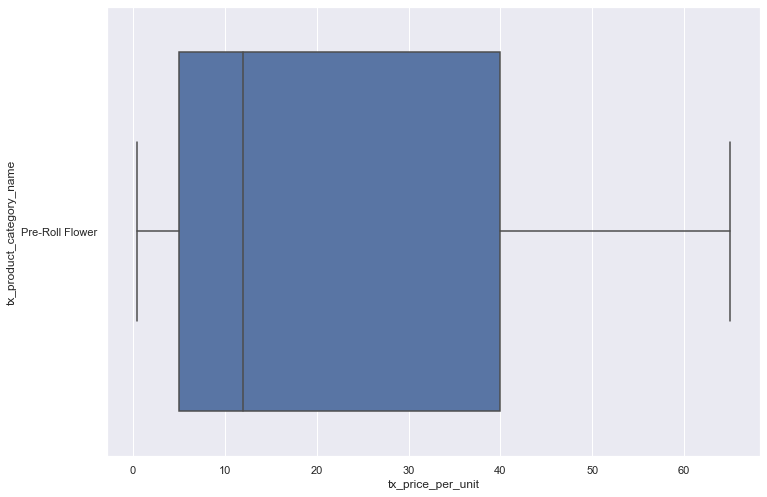

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.004842615012106538 %


In [22]:
mba.boxplot_distribution_outlier_check('tx_product_category_name', 'Pre-Roll Flower', 'S')

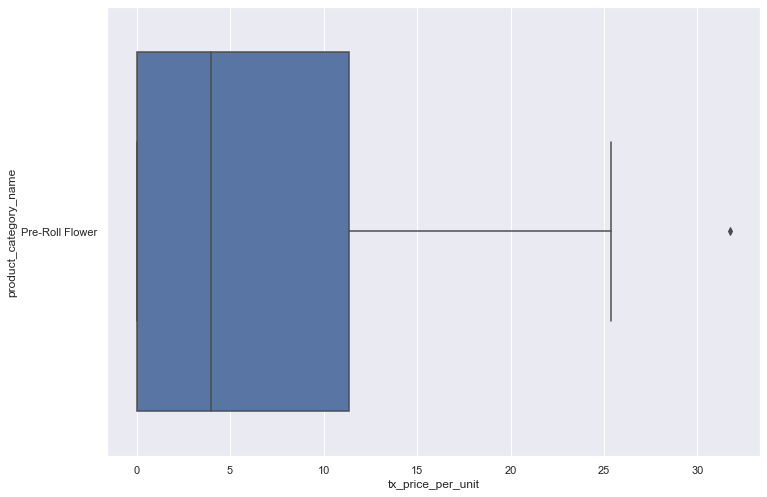

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.021739130434782608 %


In [23]:
mba.boxplot_distribution_outlier_check('product_category_name', 'Pre-Roll Flower', 'C')

Total number of transactions for Pre-Roll Flower in tx_product_category_name : 1652


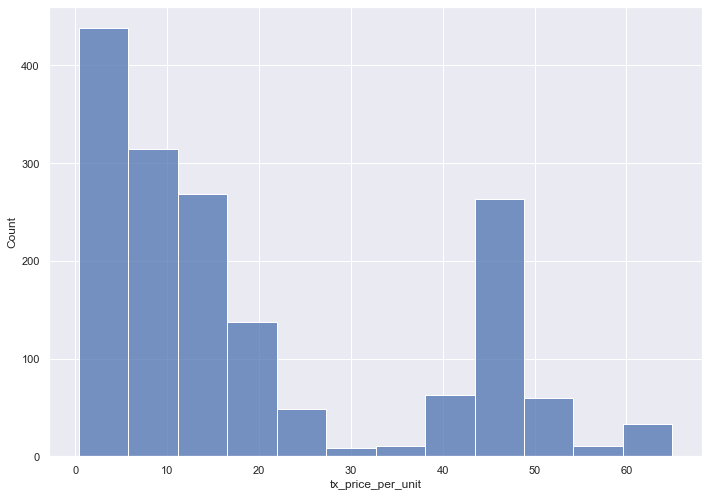

In [24]:
mba.histogram_distribution_check('tx_product_category_name', 'Pre-Roll Flower', 'S')

Total number of transactions for Pre-Roll Flower in product_category_name : 92


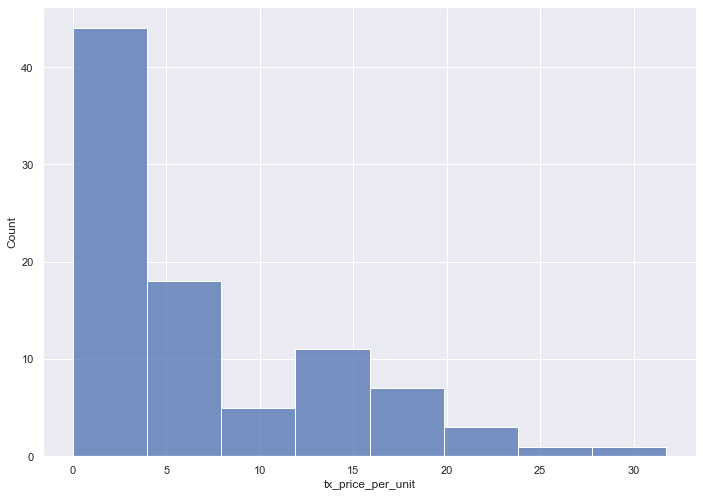

In [25]:
mba.histogram_distribution_check('product_category_name', 'Pre-Roll Flower', 'C')

In [26]:
mba.summary_table_by_category('tx_product_category_name', 'Pre-Roll Flower', 'S')

count    1652.00
mean       19.53
std        17.41
min         0.41
25%         5.00
50%        12.00
75%        40.00
max        65.00
Name: Pre-Roll Flower, dtype: float64


In [27]:
mba.summary_table_by_category('product_category_name', 'Pre-Roll Flower', 'C')

count    90.00
mean      6.42
std       7.29
min       0.00
25%       0.01
50%       4.00
75%      11.38
max      31.75
Name: Pre-Roll Flower, dtype: float64


In [28]:
mba.summary_table_by_category_time('tx_product_category_name', 'Pre-Roll Flower', 'S')

               count   mean    std    min   25%   50%    75%   max
date_in_month                                                     
2020-09          9.0  21.28   7.50   9.00  20.0  22.5  25.00  30.0
2020-10         28.0  13.06   8.20   1.00  10.0  10.0  21.56  30.0
2020-11         30.0  26.92  12.51  10.00  24.0  25.0  37.88  45.0
2020-12         96.0  15.63  12.84   4.25   5.0  10.0  24.00  45.0
2021-01         89.0   8.96   7.94   1.00   5.0   5.0  10.00  58.5
2021-02         66.0  23.89  19.39   1.00  10.0  15.0  35.00  65.0
2021-03         88.0  20.44  15.39   4.50  10.0  15.0  36.00  65.0
2021-04        129.0  23.93  17.39   1.00  10.0  16.0  45.00  65.0
2021-05        172.0  11.99  13.25   0.41   1.0  10.0  18.00  50.0
2021-06        121.0  13.05  15.03   1.00   1.0   5.0  20.00  50.0
2021-07        212.0  16.42  17.88   1.00   1.0  10.0  40.00  50.0
2021-08        111.0  19.75  19.96   1.00   1.0  15.0  45.00  60.0
2021-09         71.0  31.52  19.77   1.00  15.0  45.0  45.00  

In [29]:
mba.summary_table_by_category_time('product_category_name', 'Pre-Roll Flower', 'C')

               count   mean    std    min    25%    50%    75%    max
date_in_month                                                        
2020-09          8.0   4.44   4.97   0.00   0.00   2.50   9.00  12.50
2020-10          3.0   0.01   0.00   0.01   0.01   0.01   0.01   0.01
2020-11          1.0  18.00    NaN  18.00  18.00  18.00  18.00  18.00
2020-12          5.0   1.45   0.94   0.01   1.00   2.00   2.00   2.25
2021-01         12.0   7.68  10.41   0.01   0.01   4.30   7.86  31.75
2021-02         12.0   7.33   6.58   1.00   2.00   4.00  12.00  20.00
2021-03          4.0  11.25   7.50   0.01  11.25  15.00  15.00  15.00
2021-04          4.0   6.26   8.50   0.01   0.01   3.50   9.75  18.00
2021-05          2.0   0.02   0.00   0.02   0.02   0.02   0.02   0.02
2021-06          1.0   0.01    NaN   0.01   0.01   0.01   0.01   0.01
2021-07          8.0   4.88   6.47   0.01   0.01   2.50   6.75  15.00
2021-08          9.0  14.33   6.36   1.00  15.00  15.00  18.00  20.00
2021-09          1.0

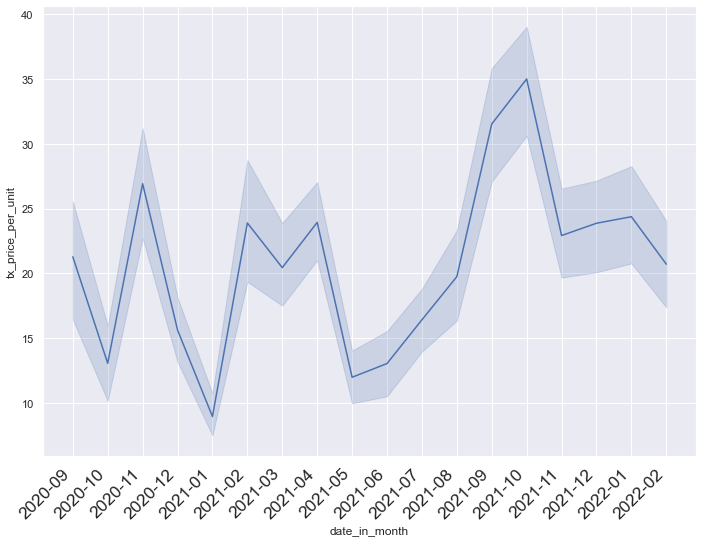

In [30]:
mba.line_plot_time_series_msrp_by_category('tx_product_category_name', 'Pre-Roll Flower', 'S', 95, 'band')

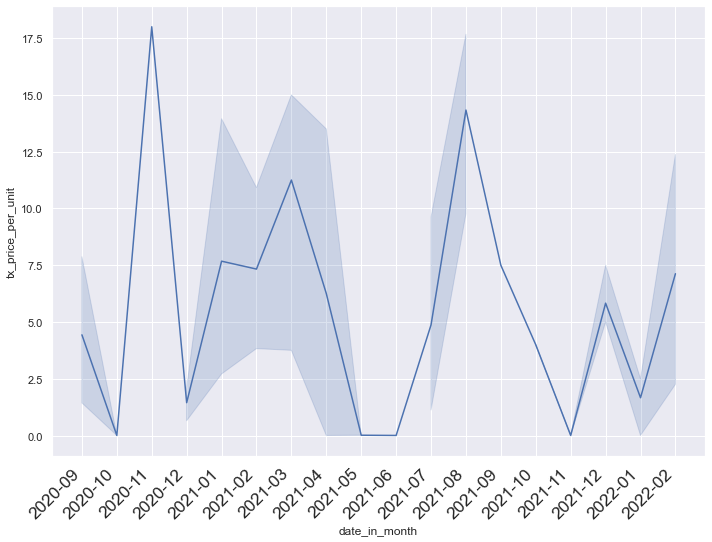

In [31]:
mba.line_plot_time_series_msrp_by_category('product_category_name', 'Pre-Roll Flower', 'C', 95, 'band')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


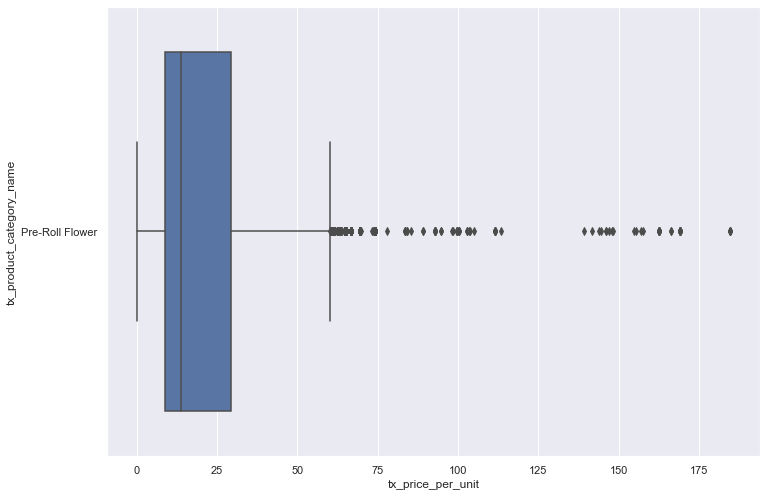

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.15395726588902214 %
### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 31043


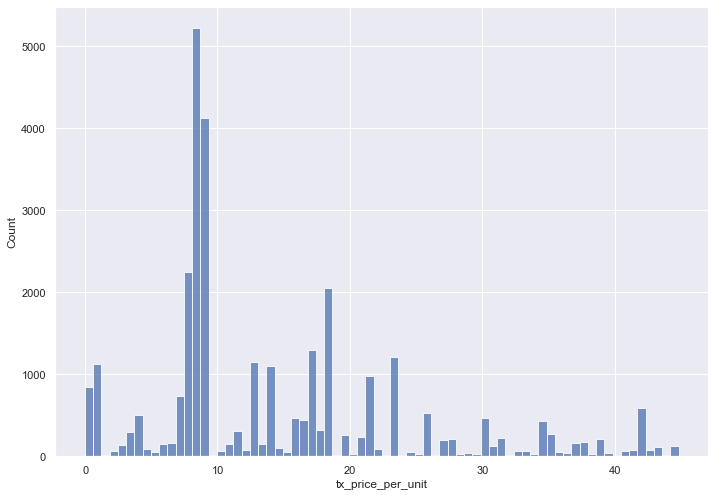

### Outputting summary table ### 	
count    31043.00
mean        14.72
std         10.11
min         -0.01
25%          8.67
50%          9.28
75%         18.56
max         44.83
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean    std   min   25%    50%    75%    max
date_in_month                                                       
2020-06         698.0  14.18   9.78  0.00  7.89   9.28  19.72  44.54
2020-07        2244.0  14.93   9.49  0.00  9.28  13.92  18.56  44.55
2020-08        2303.0  17.90  10.17  0.00  9.28  16.70  18.80  44.55
2020-09        1906.0  16.78  10.62  0.00  9.28  13.92  18.56  44.55
2020-10        1594.0  16.58  10.16  0.01  9.28  13.92  18.56  44.54
2020-11         855.0  16.65   9.95  0.00  9.28  16.70  20.88  44.54
2020-12         764.0  17.15  10.71  0.00  9.28  16.70  18.56  44.57
2021-01        1001.0  14.87   9.99 -0.01  9.28   9.28  18.56  44.54
2021-02        1364.0  13.61

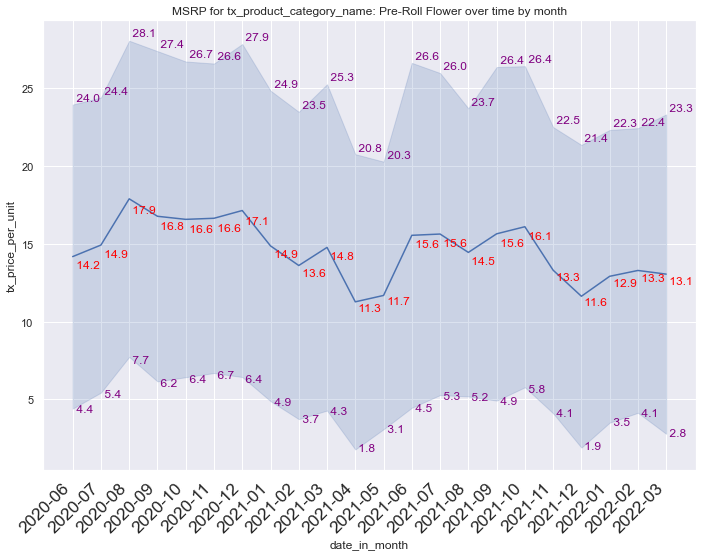

In [4]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


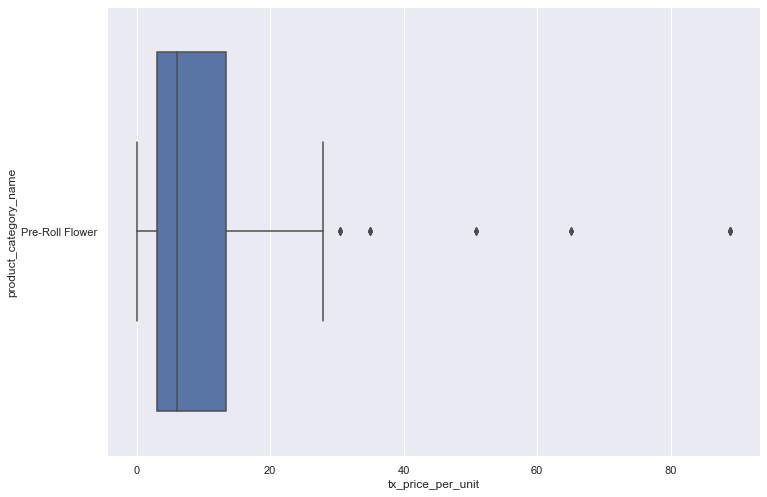

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.05032618825722274 %
### Checking histogram distribution of MSRP for given product_category_name ### 	
Total number of transactions for Pre-Roll Flower in product_category_name : 1019


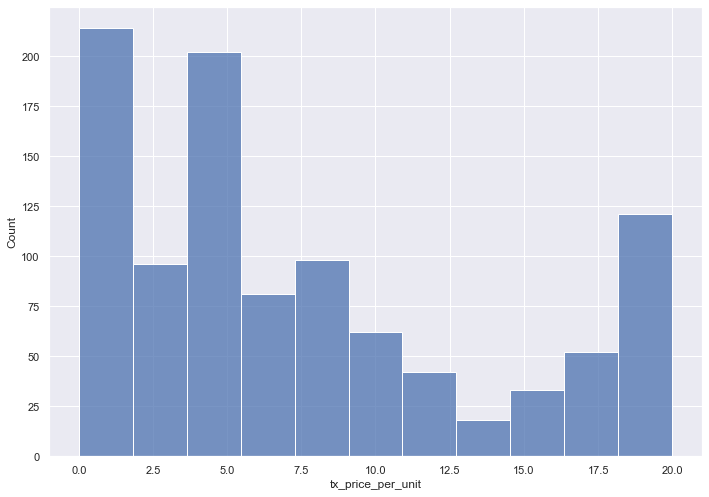

### Outputting summary table ### 	
count    1019.00
mean        7.50
std         6.62
min         0.00
25%         2.50
50%         5.25
75%        12.50
max        20.00
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean   std    min    25%    50%    75%   max
date_in_month                                                      
2020-06         68.0   6.76  6.90   0.01   1.00   5.00   8.00  20.0
2020-07         86.0   6.68  6.37   0.00   0.03   5.50   8.00  20.0
2020-08        111.0   6.21  6.10   0.01   0.01   4.00   8.00  20.0
2020-09         67.0  10.16  6.85   0.01   5.25   7.30  18.00  20.0
2020-10         22.0  11.33  7.53   0.01   5.62  12.50  20.00  20.0
2020-11         21.0   7.38  8.51   0.01   0.01   4.00  20.00  20.0
2020-12         29.0   6.12  6.78   0.01   0.01   4.00   9.44  20.0
2021-01         41.0   5.80  7.27   0.01   0.01   3.75  12.50  20.0
2021-02         67.0   6.80  5.90   0.01   3.5

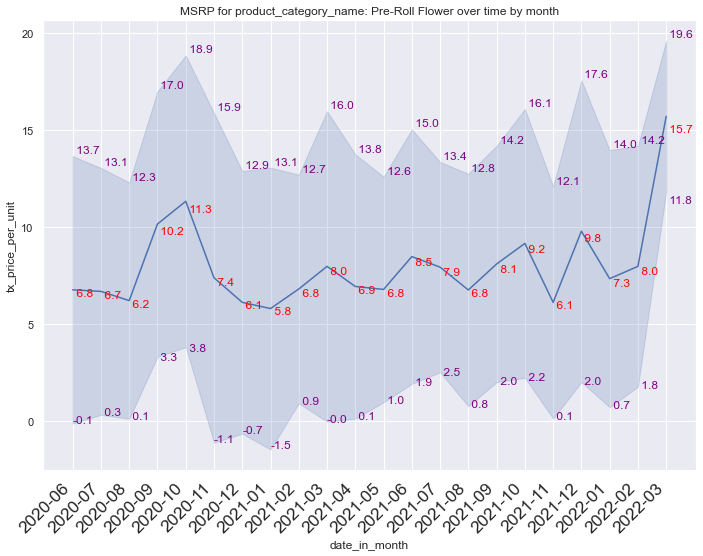

In [5]:
mba.run_analysis('product_category_name', 'Pre-Roll Flower', 'C')

In [29]:
mba.company_costs_df.product_category_name.value_counts()

Edible (weight - each)                 2206
Vape Cartridge (weight - each)         1142
Pre-Roll Flower                        1068
Flower (packaged eighth - each)        1042
Vape Cartridge (volume - each)          900
Extract (weight - each)                 723
Pre-Roll Infused                        616
Edible (volume - each)                  360
Tincture (volume - each)                332
Other Concentrate (weight - each)       276
Topical (weight - each)                 200
Pre-Roll Leaf                           160
Flower                                  145
Topical (volume - each)                 133
Flower (packaged gram - each)           101
Capsule (weight - each)                  93
Flower (packaged quarter - each)         46
Flower (packaged half ounce - each)      46
Shake (Packaged Gram - each)             32
Flower (packaged ounce - each)           21
Shake (Packaged Half Ounce - each)       19
Flower (packaged - each)                 14
Tincture (weight - each)        

In [83]:
mba.msrp_summary_table_by_time.index

Index(['2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03'],
      dtype='object', name='date_in_month')

In [79]:
mba.msrp_summary_table_by_time['lower_confidence_band'] = mba.msrp_summary_table_by_time['mean'] - mba.msrp_summary_table_by_time['std']
mba.msrp_summary_table_by_time['upper_confidence_band'] = mba.msrp_summary_table_by_time['mean'] + mba.msrp_summary_table_by_time['std']

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


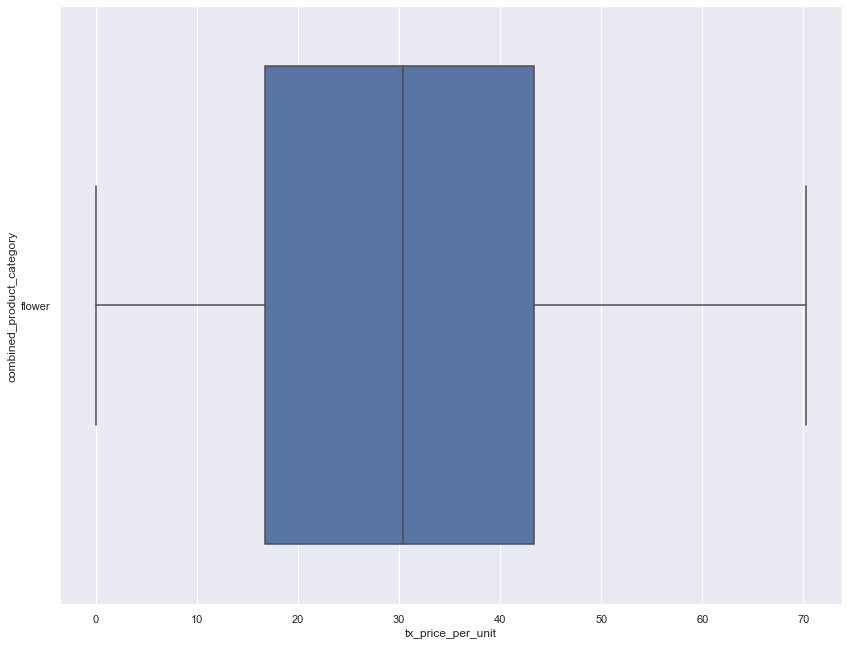

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 34351


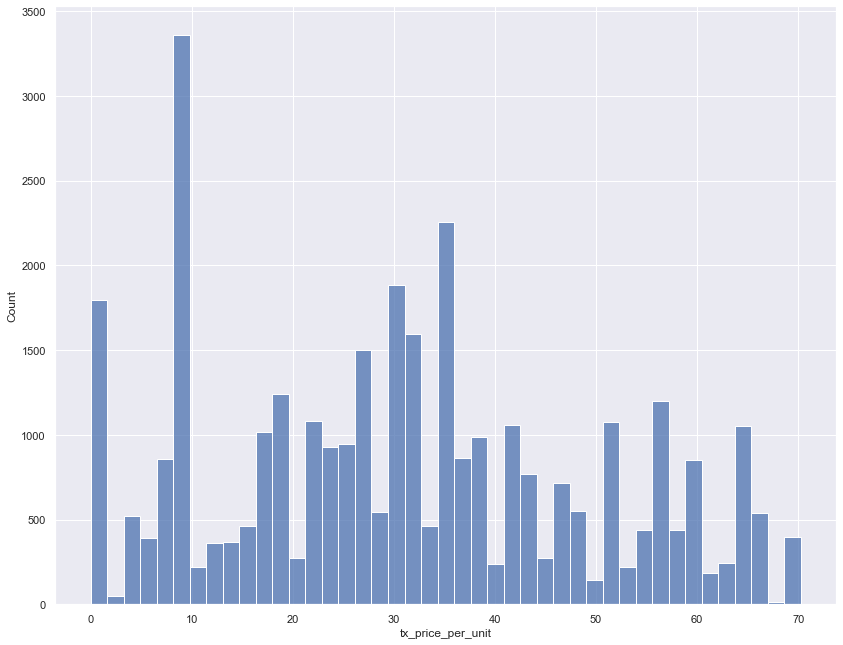

### Outputting summary table ### 	
count    34351.00
mean        31.03
std         18.57
min         -0.01
25%         16.71
50%         30.36
75%         43.37
max         70.27
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean    std   min    25%    50%    75%    max
date_in_month                                                        
2020-06        1139.0  22.02  17.21  0.00   8.35  15.78  35.49  69.61
2020-07        2296.0  28.32  20.77  0.00   9.28  26.25  41.88  69.61
2020-08        2170.0  27.21  20.90  0.00   9.28  18.56  41.76  69.61
2020-09        1742.0  28.12  19.70  0.01   9.28  19.49  41.76  68.92
2020-10        1535.0  24.48  19.56 -0.01   8.35  13.26  41.76  70.20
2020-11        1426.0  25.24  20.31  0.00   8.35  16.70  37.58  69.61
2020-12        1593.0  32.43  19.50  0.00  14.58  29.70  48.26  69.65
2021-01        1537.0  37.90  18.93  0.00  25.98  37.12  54.29  69.61
2021-02        1446.0  37.1

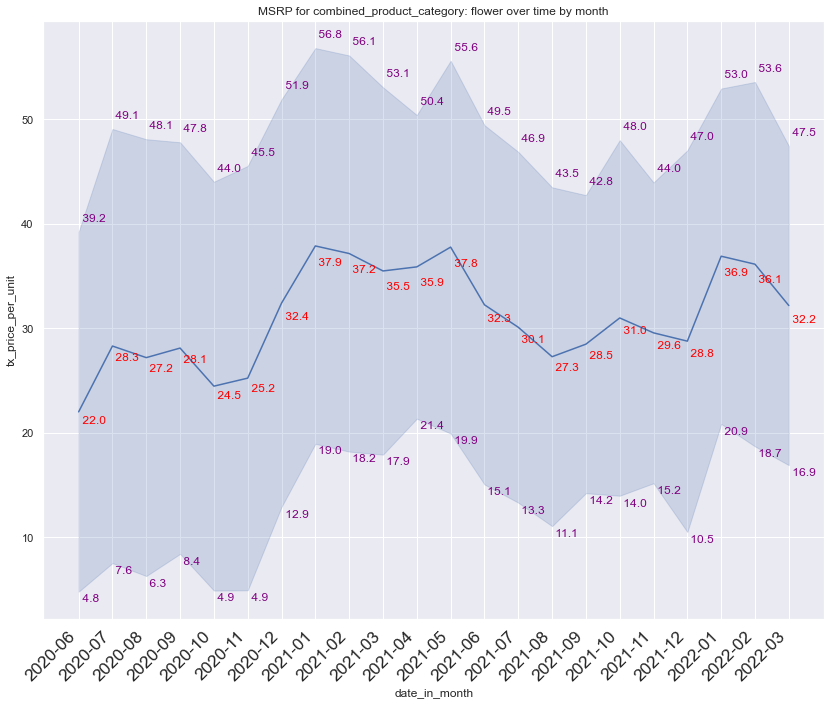

In [87]:
mba.run_analysis('combined_product_category', 'flower', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	


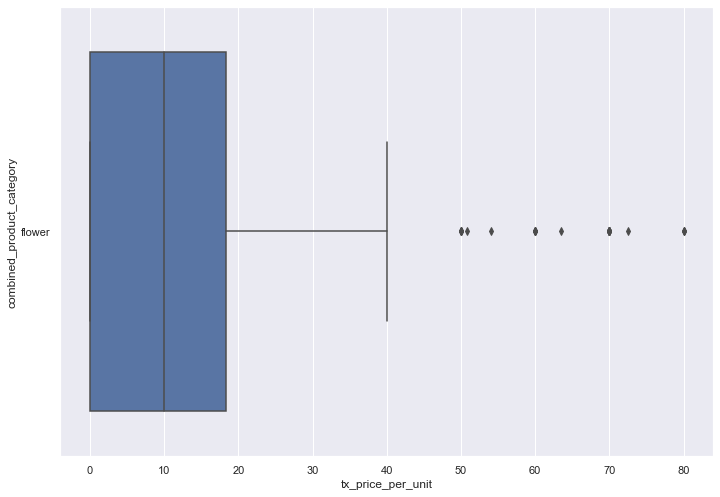

Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.023321554770318022 %
### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 1382


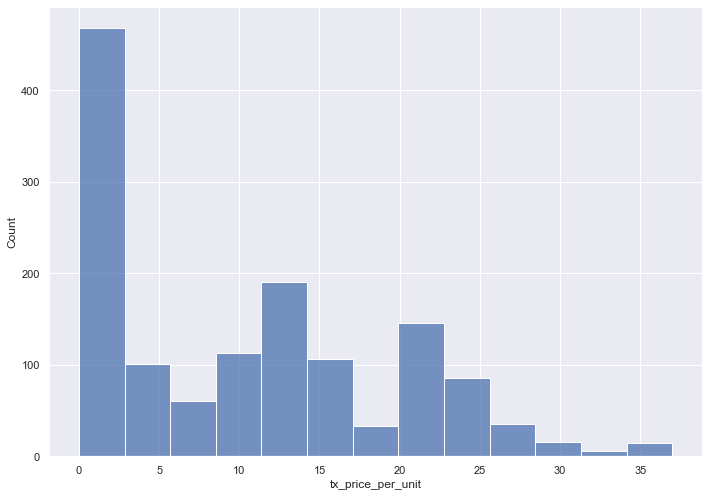

### Outputting summary table ### 	
count    1373.00
mean       10.17
std         9.52
min         0.00
25%         0.01
50%        10.00
75%        16.50
max        37.00
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean    std    min    25%    50%    75%    max
date_in_month                                                        
2020-06        101.0   7.17   8.67   0.00   0.03   2.00  14.00  27.50
2020-07         86.0   8.53   9.14   0.00   0.10   4.48  15.00  27.50
2020-08         80.0   7.74  10.82   0.01   0.01   3.29  13.94  37.00
2020-09         96.0   9.83  10.68   0.00   2.79   4.47  17.00  37.00
2020-10         95.0  10.97   8.53   0.01   3.57  12.50  16.99  27.50
2020-11         18.0   6.52  10.83   0.01   0.01   0.01  15.02  25.00
2020-12         30.0   6.64   8.53   0.01   0.01   0.01  15.38  25.00
2021-01         68.0  10.38  10.58   0.00   0.01  12.50  20.00  30.00
2021-02         77.0  10.05   9.48 

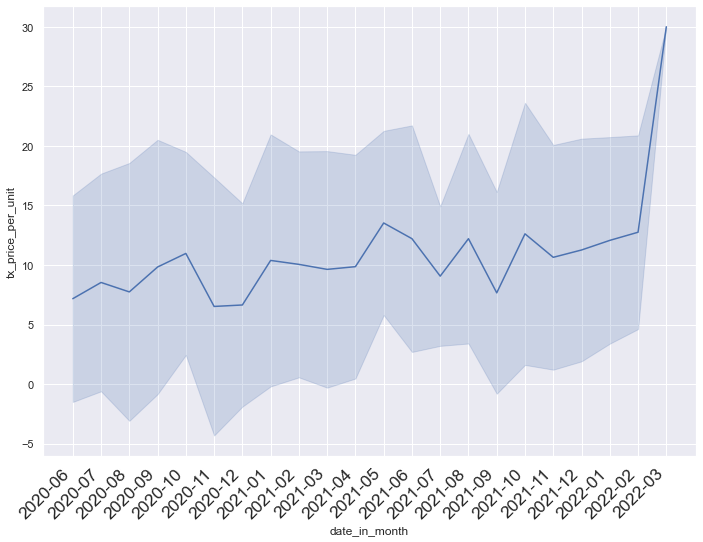

In [61]:
mba.run_analysis('combined_product_category', 'flower', 'C')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.6209298803574133 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.2726033621081327 %


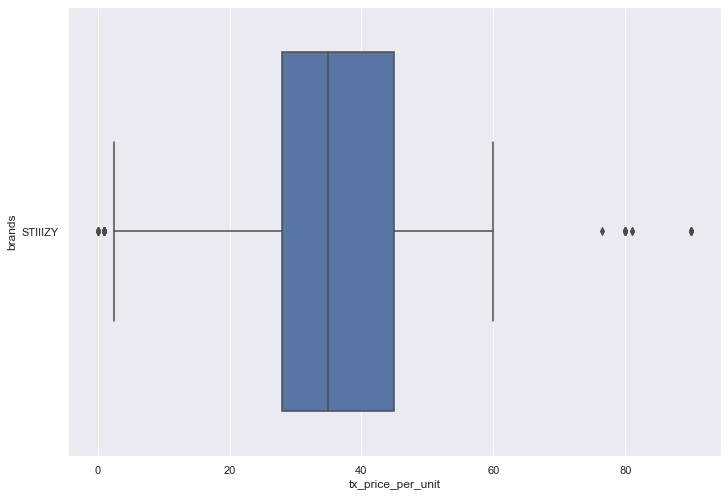

### Checking histogram distribution of MSRP for given brands ### 	
Total number of transactions for STIIIZY in brands : 6544


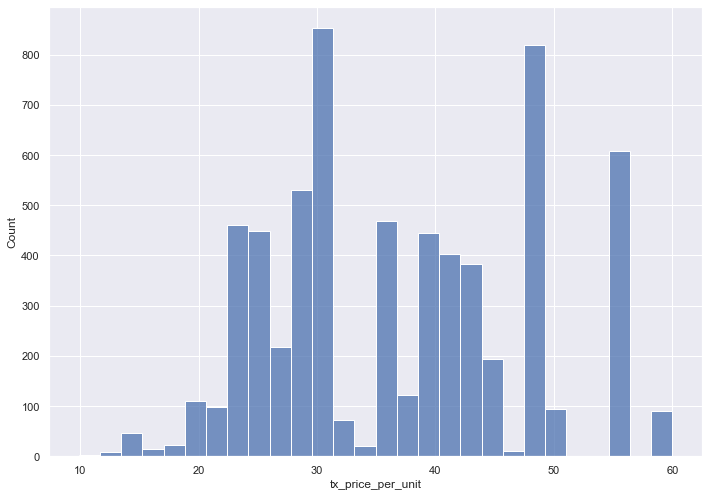

### Outputting summary table ### 	
count    6544.00
mean       36.89
std        10.72
min         9.90
25%        28.00
50%        35.00
75%        45.00
max        60.00
Name: STIIIZY, dtype: float64
### Outputting summary table by time broken down in months ### 	
               count   mean    std    min   25%   50%    75%   max
date_in_month                                                     
2020-03        109.0  26.91   2.75  15.00  27.0  27.0  27.00  30.0
2020-04        103.0  31.23   6.17  21.00  27.0  30.0  30.00  45.0
2020-05         21.0  43.08   6.59  30.00  44.2  45.0  45.00  50.0
2020-06         78.0  46.92   4.60  27.50  45.0  50.0  50.00  50.0
2020-07         90.0  27.54   2.52  16.50  27.0  27.0  30.00  30.0
2020-08        101.0  29.02   6.00  15.00  27.0  27.0  30.00  50.0
2020-09        306.0  35.09  10.04  15.00  25.2  30.0  45.00  50.0
2020-10        327.0  34.96   9.46  15.20  25.2  35.0  43.20  50.0
2020-11        330.0  36.86   9.57  19.97  26.4  40.8  43.45  50

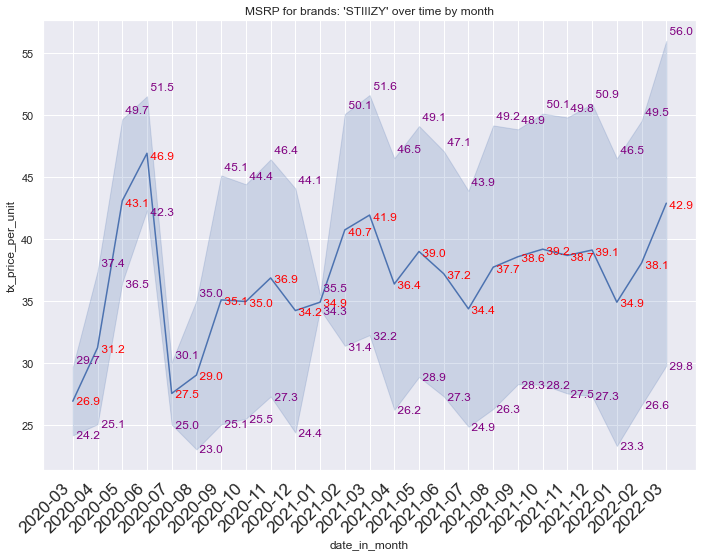

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-03                        24.16                  29.66
2020-04                        25.06                  37.40
2020-05                        36.49                  49.67
2020-06                        42.32                  51.52
2020-07                        25.02                  30.06
2020-08                        23.02                  35.02
2020-09                        25.05                  45.13
2020-10                        25.50                  44.42
2020-11                        27.29                  46.43
2020-12                        24.37                  44.07
2021-01                        34.32                  35.48
2021-02                        31.38                  50.08
2021-03                        32.25                  51.61
2021-04                        26.23                  46.51
2021-05                        28.87    

In [41]:
mba.run_analysis('brands', 'STIIIZY', 'S')